# Regression Model

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
regmo = pd.read_csv('ENB2012_data.csv')
regmo.head(2)

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33


In [3]:
#rename columns
column_names = {'X1':'Relative_Compactness', 'X2': 'Surface_Area', 
                'X3':  'Wall_Area', 'X4': 'Roof_Area', 'X5': 'Overall_Height',
                'X6': 'Orientation', 'X7': 'Glazing_Area', 
                'X8': 'Glazing_Area_Distribution', 
                'Y1': 'Heating_Load', 'Y2': 'Cooling_Load'}
regmo =regmo.rename(columns= column_names)
regmo.head(2)

,Relative_Compactness,Surface_Area,Wall_Area,Roof_Area,Overall_Height,Orientation,Glazing_Area,Glazing_Area_Distribution,Heating_Load,Cooling_Load
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33


In [6]:
sl_regmo = regmo[['Relative_Compactness', 'Cooling_Load']].sample(15, random_state= 2)
sl_regmo

,Relative_Compactness,Cooling_Load
158,0.82,25.35
251,0.86,31.28
631,0.90,33.31
757,0.66,17.79
689,0.79,47.59
573,0.62,17.21
553,0.74,17.25
728,0.86,29.69
183,0.66,13.83
515,0.69,14.60


Text(0.5, 1.0, 'Regression Plot')

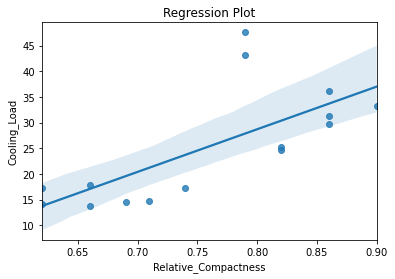

In [8]:
sns.regplot(x= 'Relative_Compactness', y= 'Cooling_Load', data= sl_regmo)
plt.title('Regression Plot')

# Measuring Regression Performance

In [11]:
#We normalise our dataset to a common scale using Min Max Scaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [13]:
normalised_regmo = pd.DataFrame(scaler.fit_transform(regmo), columns=regmo.columns)

In [14]:
features_regmo = normalised_regmo.drop(columns =['Heating_Load', 'Cooling_Load'])
heating_target = normalised_regmo['Heating_Load']

In [15]:
# Now we split our dataset into the training and testing dataset.
# We had earlier segmented the features and target variables

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(features_regmo, heating_target, test_size= 0.3, random_state=1 )

In [19]:
from sklearn.linear_model import LinearRegression
linear_model = LinearRegression()
# Fit the model to the training dataset
linear_model.fit(x_train,y_train)

# Obtain Predictions
predicted_values = linear_model.predict(x_test)

In [21]:
# Mean Absolute Error
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, predicted_values)
round(mae,3)

0.063

> The smaller the MAE is, the better the model. 
>Therefore, if the MAE is 0, the model is perfect and accurately predicts results which is almost impossible.  
>The mean absolute error is more robust to outliers

In [22]:
# Residual sum of square

from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(y_test, predicted_values))
round(rmse, 3)

0.089

In [23]:
# R-Squared 
from sklearn.metrics import r2_score
r2_score = r2_score(y_test,predicted_values)
round(r2_score, 3)

0.894

In [24]:
# Ridge Regression
from sklearn.linear_model import Ridge
ridge_regmo = Ridge(alpha=0.5)
ridge_regmo.fit(x_train, y_train)

Ridge(alpha=0.5)

In [26]:
#Lasso Regression
from sklearn.linear_model import Lasso
lasso_regmo = Lasso(alpha = 0.001)
lasso_regmo.fit(x_train, y_train)

Lasso(alpha=0.001)

In [28]:
# Comparing the effect of regularization
def get_weights_regmo(model, feat, col_name):
    weights = pd.Series(model.coef_, feat.columns).sort_values()
    weights_regmo = pd.DataFrame(weights).reset_index()
    weights_regmo.columns= ['Features', col_name]
    weights_regmo[col_name].round(3)
    return weights_regmo

In [35]:
linear_model_weights = get_weights_regmo(linear_model, x_train, 'Linear_model_weight').round(3)
ridge_weights_regmo = get_weights_regmo(ridge_regmo, x_train, 'Ridge_Weight').round(3)
lasso_weights_regmo = get_weights_regmo(lasso_regmo, x_train, 'Lasso_Weight').round(3)

final_weight = pd.merge(linear_model_weights, ridge_weights_regmo, on='Features')
final_weight =pd.merge(final_weight, lasso_weights_regmo, on='Features')

final_weight

,Features,Linear_model_weight,Ridge_Weight,Lasso_Weight
0,Surface_Area,-3.458480e+12,-0.062,0.000
1,Relative_Compactness,-6.060000e-01,-0.283,-0.028
2,Orientation,5.000000e-03,0.003,0.000
3,Glazing_Area_Distribution,3.100000e-02,0.029,0.021
4,Glazing_Area,2.120000e-01,0.212,0.206
5,Overall_Height,3.960000e-01,0.442,0.463
6,Wall_Area,2.017447e+12,0.103,0.200
7,Roof_Area,2.593860e+12,-0.163,-0.000
